**Importing Libraries**

In [1]:
#Importing the Libraries
#or data manipulation, analysis, and handling. 
import numpy as np
import pandas as pd

#for machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#for data visualization
import matplotlib as plt
import seaborn as sns

**Data Collection & Analysis**

In [2]:
# Load the data from the xlsx file to a Pandas DataFrame
BreastCancer_data = pd.read_excel('BreastCancer.xlsx')

In [3]:
#displaying the first few rows of the dataset/viewed as a preview
BreastCancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [4]:
#displaying the number of row and columns in the dataset
print(BreastCancer_data.shape)

(569, 11)


In [5]:
#displaying information about the imported dataset including the no. of rows and columns
BreastCancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave_points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [6]:
# Checking for missing values in each column
BreastCancer_data.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [7]:
# Displaying some statistical measures about the data
BreastCancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


**Data Visualization**

<Axes: >

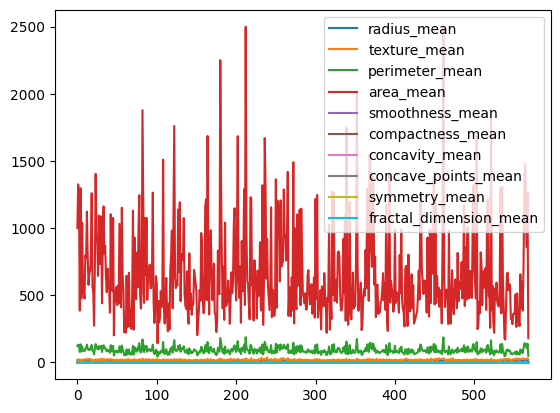

In [8]:
#Line plot using matplotlib
BreastCancer_data.plot()

<Axes: title={'center': 'Scatter Plot of Selected Features'}, xlabel='Radius Mean', ylabel='Texture Mean'>

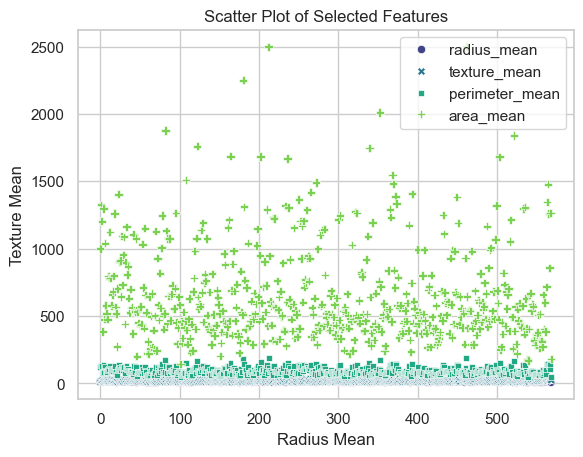

In [9]:
#using seaborn library
#scatter plot

# Choose specific columns for the scatter plot
selected_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# Create a scatter plot using seaborn
sns.set(style="whitegrid")
scatter_plot = sns.scatterplot(data=BreastCancer_data[selected_columns], palette='viridis')

# Set plot labels and title
scatter_plot.set(xlabel='Radius Mean', ylabel='Texture Mean', title='Scatter Plot of Selected Features')

sns.scatterplot()

In [10]:
# Displaying the distribution of the target variable
BreastCancer_data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
# Grouping the data based on the target variable
BreastCancer_data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


In [12]:
# Data Pre-Processing
# Separating the features and target
X_BreastCancer = BreastCancer_data.drop(columns=['diagnosis'], axis=1)
Y_BreastCancer = BreastCancer_data['diagnosis']

In [13]:
# Displaying the features
print(X_BreastCancer)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave_points_mean  sym

In [14]:
# Displaying the target
print(Y_BreastCancer)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


**Data Splitting**

In [15]:
# Splitting the data into training and test sets
X_train_BreastCancer, X_test_BreastCancer, Y_train_BreastCancer, Y_test_BreastCancer = train_test_split(X_BreastCancer, Y_BreastCancer, test_size=0.2, random_state=2)


In [16]:
# Displaying the shapes of the training and test sets
print(X_BreastCancer.shape, X_train_BreastCancer.shape, X_test_BreastCancer.shape)

(569, 10) (455, 10) (114, 10)


**Model Training**

In [17]:
# Model Training
# Support Vector Machine Model
breast_cancer_model = svm.SVC(kernel='linear')

In [18]:
# Training the SVM model with training data
breast_cancer_model.fit(X_train_BreastCancer, Y_train_BreastCancer)


SVC(kernel='linear')

**Model Evaluaiton**

In [19]:
# Model Evaluation
# Accuracy Score on training data
X_train_prediction_BreastCancer = breast_cancer_model.predict(X_train_BreastCancer)
training_data_accuracy_BreastCancer = accuracy_score(Y_train_BreastCancer, X_train_prediction_BreastCancer)
print('Accuracy score on training data:', training_data_accuracy_BreastCancer)


Accuracy score on training data: 0.9208791208791208


In [20]:
# Accuracy score on test data
X_test_prediction_BreastCancer = breast_cancer_model.predict(X_test_BreastCancer)
test_data_accuracy_BreastCancer = accuracy_score(Y_test_BreastCancer, X_test_prediction_BreastCancer)
print('Accuracy score on test data:', test_data_accuracy_BreastCancer)

Accuracy score on test data: 0.9122807017543859


In [21]:
# Precision on test data
precision = precision_score(Y_test_BreastCancer, X_test_prediction_BreastCancer, pos_label='B')
print('Precision on test data:', precision)

# Recall on test data
recall = recall_score(Y_test_BreastCancer, X_test_prediction_BreastCancer, pos_label='B')
print('Recall on test data:', recall)

# F1-score on test data
f1 = f1_score(Y_test_BreastCancer, X_test_prediction_BreastCancer, pos_label='B')
print('F1 score on test data:', f1)

# Confusion Matrix on test data
conf_matrix = confusion_matrix(Y_test_BreastCancer, X_test_prediction_BreastCancer)
print('Confusion Matrix on test data:\n', conf_matrix)


Precision on test data: 0.927536231884058
Recall on test data: 0.927536231884058
F1 score on test data: 0.927536231884058
Confusion Matrix on test data:
 [[64  5]
 [ 5 40]]


**Building a Predictive System**

In [22]:
# Building a Predictive System
# Example input data
input_data_BreastCancer = np.array([13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766])


# Reshape the input data
input_data_reshaped_BreastCancer = input_data_BreastCancer.reshape(1, -1)

# Make a prediction
prediction_BreastCancer = breast_cancer_model.predict(input_data_reshaped_BreastCancer)
print(prediction_BreastCancer)

# Interpret the prediction
if prediction_BreastCancer[0] == 'M':
    print("The breast cancer is malignant.")
else:
    print("The breast cancer is benign.")

['B']
The breast cancer is benign.


C:\Users\taiga\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Saving the Model**

In [23]:
import pickle
filename = 'breast_cancer_model.sav'
pickle.dump(breast_cancer_model, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('breast_cancer_model.sav', 'rb'))

In [24]:
#printing the names of the columns
for column in X_BreastCancer.columns:
  print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave_points_mean
symmetry_mean
fractal_dimension_mean
